# PRSice exercise

Explore the base GWAS and compute polygenic scores for height in Europeans using PRSice2. 

<img src="../Images/bash.png" alt="R" width="40"> Bash kernel.


In [1]:
ln -sf ../../Data
ln -sf ../Results

<img src="../Images/R.png" alt="R" width="40"> R kernel.

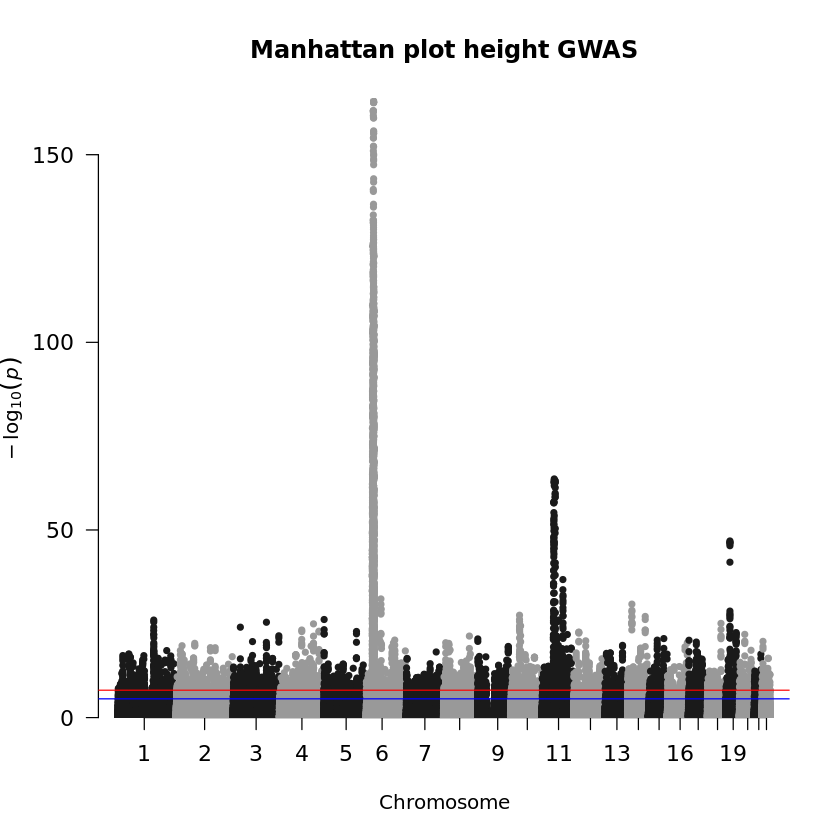

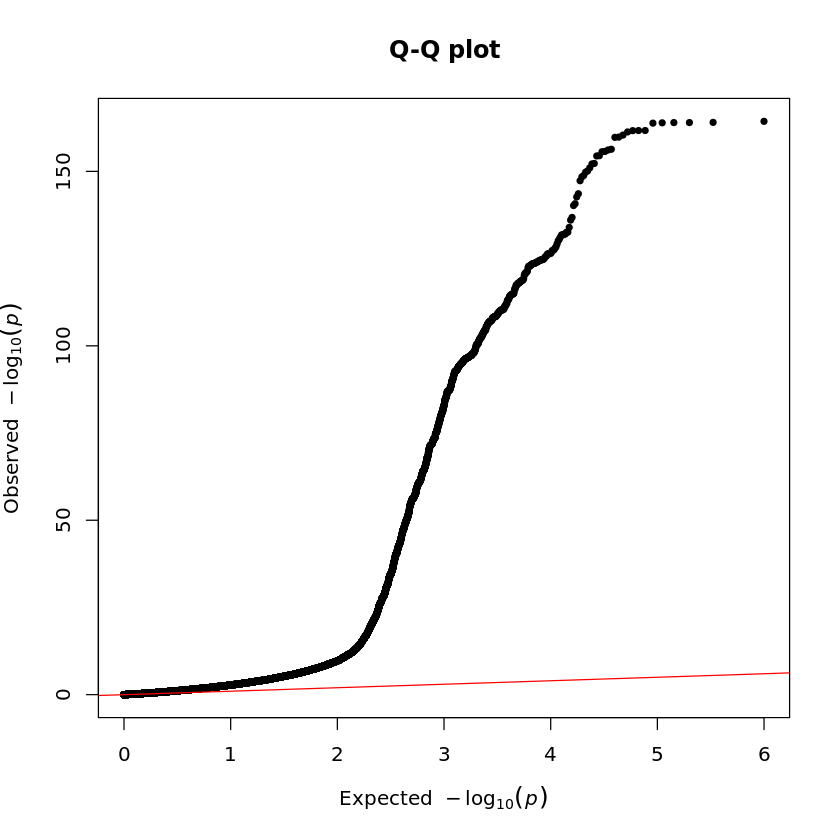

In [1]:
# Setup to avoid long messages and plot on screen
options(warn=-1)
options(jupyter.plot_mimetypes = 'image/png')

# Load GWAS package qqman
suppressMessages(library("qqman"))

# Manhattan plot using --logistic results
height_eur <- read.table("./Data/Height.QC.gz", head=TRUE)
manhattan(height_eur, main = "Manhattan plot height GWAS", cex.axis=1.1)

## QQ plot 
qq(height_eur$P, main = "Q-Q plot")


Does the plot surprise you? You can notice extreme deviations in the QQ-plot and an overwhelming number of significant variants. To refine your analysis and avoid false positives, you should perform MAF and INFO filtering to exclude rare variants and poorly imputed or uncertain variants that could lead to false associations.

<img src="../Images/bash.png" alt="Bash" width="40"> Bash kernel. 

You need to perform the PRS analysis on the simulated dataset in the following way:

In [1]:
PRSice --base ./Data/Height.QC.gz \
    --target ./Data/EUR.QC \
    --binary-target F \
    --pheno ./Data/EUR.height \
    --cov ./Data/EUR.covariate \
    --base-maf MAF:0.01 \
    --base-info INFO:0.8 \
    --stat BETA \
    --out Results/GWAS7/EUR.PRSice

PRSice 2.3.5 (2021-09-20) 
https://github.com/choishingwan/PRSice
(C) 2016-2020 Shing Wan (Sam) Choi and Paul F. O'Reilly
GNU General Public License v3
If you use PRSice in any published work, please cite:
Choi SW, O'Reilly PF.
PRSice-2: Polygenic Risk Score Software for Biobank-Scale Data.
GigaScience 8, no. 7 (July 1, 2019)
2025-03-20 14:10:43
PRSice \
    --a1 A1 \
    --a2 A2 \
    --bar-levels 0.001,0.05,0.1,0.2,0.3,0.4,0.5,1 \
    --base ./Data/Height.QC.gz \
    --base-info INFO:0.8 \
    --base-maf MAF:0.01 \
    --beta  \
    --binary-target F \
    --bp BP \
    --chr CHR \
    --clump-kb 250kb \
    --clump-p 1.000000 \
    --clump-r2 0.100000 \
    --cov ./Data/EUR.covariate \
    --interval 5e-05 \
    --lower 5e-08 \
    --num-auto 22 \
    --out Results/GWAS7/EUR.PRSice \
    --pheno ./Data/EUR.height \
    --pvalue P \
    --seed 3599109867 \
    --snp SNP \
    --stat BETA \
    --target ./Data/EUR.QC \
    --thread 1 \
    --upper 0.5

Initializing Genotype file: ./Da

By looking at the output file `.summary`, we can conclude that:

- Best-fit P-value is ~0.13
- Phenotypic variation explained by the best-fitting model is ~0.21

In [2]:
cat Results/GWAS7/EUR.PRSice.summary

Phenotype	Set	Threshold	PRS.R2	Full.R2	Null.R2	Prevalence	Coefficient	Standard.Error	P	Num_SNP
-	Base	0.13995	0.214442	0.391467	0.225349	-	36115	3212.41	3.81121e-26	85982


<img src="../Images/R.png" alt="R" width="40"> R kernel.

Below is an example of how you could create a plot in R to visualize height PGS differences across sex:

Warning message:
“package ‘ggplot2’ was built under R version 4.2.3”


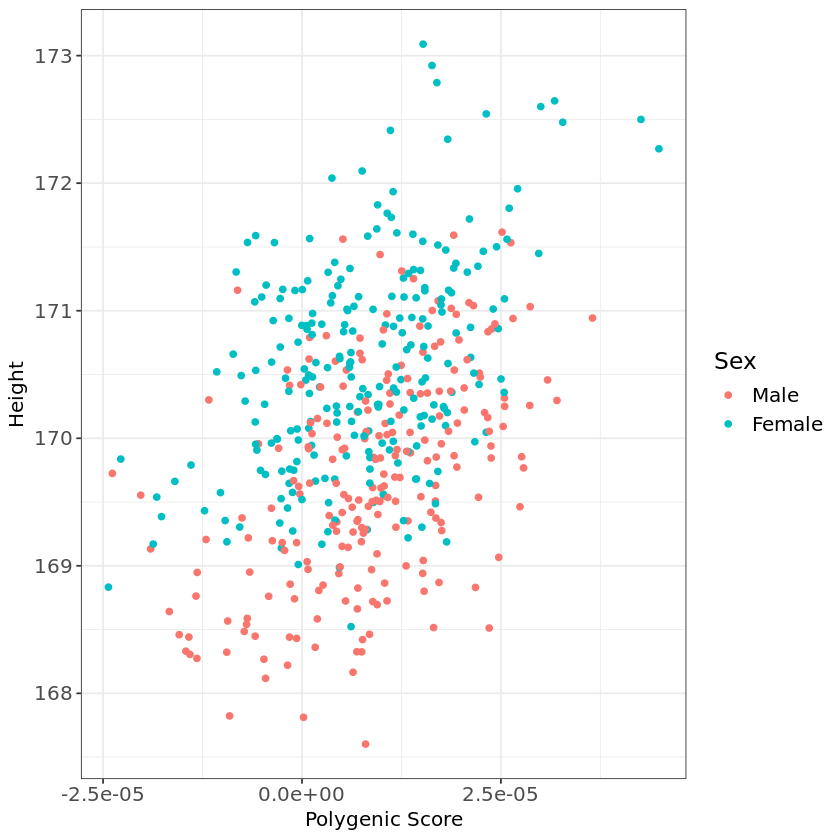

In [1]:
library(ggplot2)

# Read in the files
prs <- read.table("./Results/GWAS7/EUR.PRSice.best", header=T)
height <- read.table("./Data/EUR.height", header=T)
sex <- read.table("./Data/EUR.cov", header=T)

# Rename the sex
sex$Sex <- as.factor(sex$Sex)
levels(sex$Sex) <- c("Male", "Female")

# Merge the files
dat <- merge(merge(prs, height), sex)

# Start plotting
ggplot(dat, aes(x=PRS, y=Height, color=Sex))+
    geom_point()+
    theme_bw()+
    labs(x="Polygenic Score", y="Height") +
    theme(axis.text=element_text(size=12), axis.title=element_text(size=12), legend.text=element_text(size=12),legend.title=element_text(size=14))